# Лабораторная работа № 2

## Гусева Валерия ИУ5-63Б

# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

## Цель лабораторной работы: изучение способов предварительной обработки данных для дальнейшего формирования моделей.

## Задание:


- Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
- Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
  - обработку пропусков в данных;
  - кодирование категориальных признаков;
  - масштабирование данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, Normalizer
%matplotlib inline 
sns.set(style="ticks")

## Загрузка и первичный анализ данных

Использованные датасеты: https://www.kaggle.com/open-flights/airline-database

In [2]:
data = pd.read_csv('airlines.csv', sep=",")

In [3]:
data.shape

(6162, 8)

In [4]:
# Типы колонок
data.dtypes

Airline ID     int64
Name          object
Alias         object
IATA          object
ICAO          object
Callsign      object
Country       object
Active        object
dtype: object

In [5]:
# Проверим, есть ли пропущенные значения
data.isnull().sum()

Airline ID       0
Name             0
Alias          506
IATA          4627
ICAO            87
Callsign       808
Country         15
Active           0
dtype: int64

## Обработка пропусков в данных

In [7]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((6162, 8), (6162, 3))

In [8]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((6162, 8), (1010, 8))

### Обработка пропусков в категориальных данных

In [11]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Alias. Тип данных object. Количество пустых значений 506, 8.21%.
Колонка IATA. Тип данных object. Количество пустых значений 4627, 75.09%.
Колонка ICAO. Тип данных object. Количество пустых значений 87, 1.41%.
Колонка Callsign. Тип данных object. Количество пустых значений 808, 13.11%.
Колонка Country. Тип данных object. Количество пустых значений 15, 0.24%.


In [12]:
cat_temp_data = data[['Country']]
cat_temp_data.head()

,Country
0,\N
1,NaN
2,United States
3,South Africa
4,United Kingdom


In [13]:
cat_temp_data['Country'].unique()

array(['\\N', nan, 'United States', 'South Africa', 'United Kingdom',
       'Russia', 'Thailand', 'Canada', 'Australia', 'Singapore',
       'Belgium', 'Mexico', 'Spain', 'France', 'United Arab Emirates',
       'Republic of Korea', 'Pakistan', 'Libya', 'Gambia', 'Ivory Coast',
       'Ukraine', 'Democratic Republic of the Congo', 'Iran', 'Finland',
       'Brazil', 'Colombia', 'AEROCENTER', 'Ghana', 'Kenya', 'Liberia',
       'Togo', 'Somali Republic', 'Morocco', 'Canadian Territories',
       'Dominican Republic', 'Japan', 'Albania', 'Nigeria', 'Germany',
       'Slovenia', 'Czech Republic', 'Benin', 'AEROCESAR', 'Greece',
       'Chile', 'Tanzania', 'Bolivia', 'Italy', 'Sweden', 'Argentina',
       'Sierra Leone', 'Indonesia', 'Senegal', 'Afghanistan', 'Uganda',
       'Bosnia and Herzegovina', 'Gabon', 'Angola', 'Uzbekistan',
       'Namibia', 'Turkey', 'Vietnam', 'Zambia', 'Venezuela', 'Egypt',
       'Ireland', 'Switzerland', 'Serbia', 'Peru', 'Slovakia', 'Denmark',
       'Azer

In [14]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['\\N'],
       ['United States'],
       ['United States'],
       ...,
       ['Australia'],
       ['India'],
       ['Russia']], dtype=object)

In [15]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array([' Boonville Stage Line', ' S.A.', 'ACOM', 'ACTIVE AERO',
       'AEROCENTER', 'AEROCESAR', 'AEROPERLAS', 'AEROPUMA', 'AEROSOL',
       'AEROSUN', 'AEROVARADERO', 'AEROWEE', 'AIR CLASS', 'AIR FREIGHTER',
       'AIR PRINT', 'AIR-MAUR', 'AIREX', 'AIRFLIGHT', 'AIRMAN', 'AIRNAT',
       'AIRPAC', 'AIRPORT HELICOPTER', 'AIRWAVE', 'ALAMO', 'ALASKA',
       'ALASKA PACIFIC', 'ALCON', 'ALDAWLYH AIR', 'ALL STAR',
       'ALNACIONAL', 'ANTARES', 'APPALACHIAN', 'AQUILINE', 'ARIZAIR',
       'ARMSTRONG', 'ASA PESADA', 'ASTORIA', 'ASUR', 'ATCO',
       'ATLANTIC NICARAGUA', 'ATLANTIS CANADA', 'AUDI AIR', 'AURORA AIR',
       'AUSA', 'AVEMEX', 'AVIANCA', 'AVINOR', 'AVIOQUINTANA', 'AZIMUT',
       'Afghanistan', 'Air S', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhut

In [16]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['\\N'],
       ['NA'],
       ['United States'],
       ...,
       ['Australia'],
       ['India'],
       ['Russia']], dtype=object)

In [17]:
np.unique(data_imp3)

array([' Boonville Stage Line', ' S.A.', 'ACOM', 'ACTIVE AERO',
       'AEROCENTER', 'AEROCESAR', 'AEROPERLAS', 'AEROPUMA', 'AEROSOL',
       'AEROSUN', 'AEROVARADERO', 'AEROWEE', 'AIR CLASS', 'AIR FREIGHTER',
       'AIR PRINT', 'AIR-MAUR', 'AIREX', 'AIRFLIGHT', 'AIRMAN', 'AIRNAT',
       'AIRPAC', 'AIRPORT HELICOPTER', 'AIRWAVE', 'ALAMO', 'ALASKA',
       'ALASKA PACIFIC', 'ALCON', 'ALDAWLYH AIR', 'ALL STAR',
       'ALNACIONAL', 'ANTARES', 'APPALACHIAN', 'AQUILINE', 'ARIZAIR',
       'ARMSTRONG', 'ASA PESADA', 'ASTORIA', 'ASUR', 'ATCO',
       'ATLANTIC NICARAGUA', 'ATLANTIS CANADA', 'AUDI AIR', 'AURORA AIR',
       'AUSA', 'AVEMEX', 'AVIANCA', 'AVINOR', 'AVIOQUINTANA', 'AZIMUT',
       'Afghanistan', 'Air S', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhut

### Преобразование категориальных признаков в числовые

In [18]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,\N
1,United States
2,United States
3,South Africa
4,United Kingdom
...,...
6157,China
6158,United States
6159,Australia
6160,India


In [19]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [20]:
cat_enc['c1'].unique()

array(['\\N', 'United States', 'South Africa', 'United Kingdom', 'Russia',
       'Thailand', 'Canada', 'Australia', 'Singapore', 'Belgium',
       'Mexico', 'Spain', 'France', 'United Arab Emirates',
       'Republic of Korea', 'Pakistan', 'Libya', 'Gambia', 'Ivory Coast',
       'Ukraine', 'Democratic Republic of the Congo', 'Iran', 'Finland',
       'Brazil', 'Colombia', 'AEROCENTER', 'Ghana', 'Kenya', 'Liberia',
       'Togo', 'Somali Republic', 'Morocco', 'Canadian Territories',
       'Dominican Republic', 'Japan', 'Albania', 'Nigeria', 'Germany',
       'Slovenia', 'Czech Republic', 'Benin', 'AEROCESAR', 'Greece',
       'Chile', 'Tanzania', 'Bolivia', 'Italy', 'Sweden', 'Argentina',
       'Sierra Leone', 'Indonesia', 'Senegal', 'Afghanistan', 'Uganda',
       'Bosnia and Herzegovina', 'Gabon', 'Angola', 'Uzbekistan',
       'Namibia', 'Turkey', 'Vietnam', 'Zambia', 'Venezuela', 'Egypt',
       'Ireland', 'Switzerland', 'Serbia', 'Peru', 'Slovakia', 'Denmark',
       'Azerbaija

In [21]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [22]:
le.inverse_transform([0, 1, 2, 3])

array([' Boonville Stage Line', ' S.A.', 'ACOM', 'ACTIVE AERO'],
      dtype=object)

In [23]:
data.head()

,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
0,-1,Unknown,\N,-,NaN,\N,\N,Y
1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N


### Кодирование категорий наборами бинарных значений

In [24]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [25]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
cat_enc.head(10)

,c1
0,\N
1,United States
2,United States
3,South Africa
4,United Kingdom
5,Russia
6,Russia
7,Russia
8,United Kingdom
9,United States


### Масштабирование данных

In [27]:
data.head()

,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
0,-1,Unknown,\N,-,NaN,\N,\N,Y
1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N


### MinMax Масштабирование

### Импорт данных для масштабирования

In [29]:
data = pd.read_csv('TMDb_updated.csv', sep=",")

In [30]:
data.head()

,Unnamed: 0,title,overview,original_language,vote_count,vote_average
0,0,Ad Astra,"The near future, a time when both hope and har...",en,2853,5.9
1,1,Bloodshot,"After he and his wife are murdered, marine Ray...",en,1349,7.2
2,2,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,en,2530,7.1
3,3,Ant-Man,Armed with the astonishing ability to shrink i...,en,13611,7.1
4,4,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",en,3542,5.9


In [31]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['vote_average']])

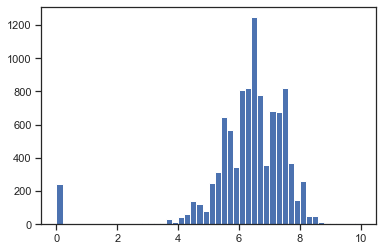

In [32]:
plt.hist(data['vote_average'], 50)
plt.show()

### Масштабирование данных на основе Z-оценки

In [33]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['vote_average']])

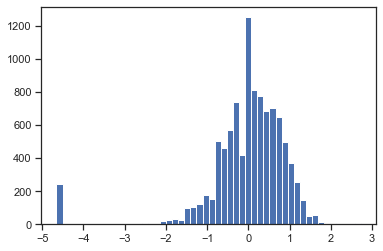

In [34]:
plt.hist(sc2_data, 50)
plt.show()